In [1]:
#importing the data and understanding what we are working wtih

import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

In [2]:
# Replace 'area.1' in column names with 'count'
data.columns = [col.replace('area.1', 'count') for col in data.columns]

# Display the updated columns to verify the changes
data.columns.tolist()

# Step 1: Extract the first two digits from the NutsID to create Nuts3ID
data['Nuts3ID'] = data['NutsID'].str[:2]

# Step 2: Map the Nuts3ID to their corresponding Designation values
designation_mapping = {
    '11': 'Norte',
    '16': 'Centro',
    '17': 'Area Metropolitana de Lisboa',
    '18': 'Alentejo',
    '15': 'Algarve'
}
data['Designation'] = data['Nuts3ID'].map(designation_mapping)



## regression number of holdings and ed level ##

In [6]:
import pandas as pd
import statsmodels.api as sm

# Example: Subset data for years 1999, 2009, and 2019
common_years = [1999, 2009, 2019]
df_subset = df[df['year'].isin(common_years)]

# Check and handle missing values in production_eur
df_subset.dropna(subset=['nuts_holdings'], inplace=True)

# Ensure predictors and target variable are in the correct format
df_subset['intercept'] = 1  # Adding intercept term

# Convert predictors to integers if they are not already
df_subset['edu_none'] = df_subset['edu_none'].astype(int)
df_subset['edu_basic'] = df_subset['edu_basic'].astype(int)
df_subset['edu_secondary'] = df_subset['edu_secondary'].astype(int)
df_subset['edu_superior'] = df_subset['edu_superior'].astype(int)

# Define predictors and target variable
predictors = ['intercept', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
target = 'nuts_holdings'

try:
    # Fit Poisson regression model
    poisson_model = sm.GLM(df_subset[target], df_subset[predictors], family=sm.families.Poisson()).fit()

    # Print model summary
    print(poisson_model.summary())

except ValueError as e:
    print(f"Error occurred: {e}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:          nuts_holdings   No. Observations:                 8646
Model:                            GLM   Df Residuals:                     8641
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7807e+05
Date:                Thu, 20 Jun 2024   Deviance:                   3.3139e+05
Time:                        16:34:01   Pearson chi2:                 5.14e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.1839      0.004    580.592

/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_9884/2934373138.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(subset=['nuts_holdings'], inplace=True)
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_9884/2934373138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['intercept'] = 1  # Adding intercept term
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_9884/2934373138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

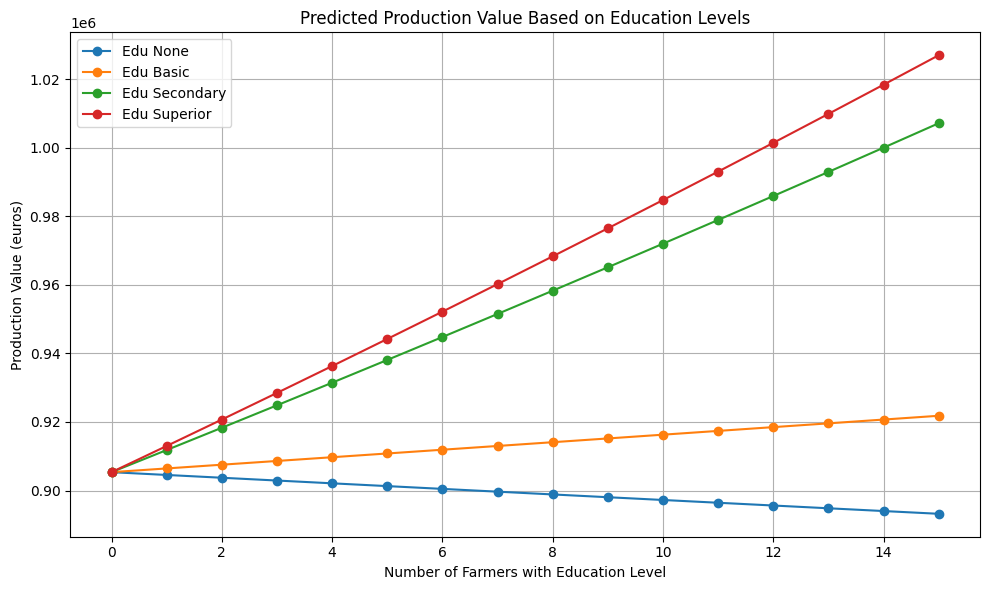

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from your Poisson regression model
coef_intercept = 13.7161
coef_edu_none = -0.0009
coef_edu_basic = 0.0012
coef_edu_secondary = 0.0071
coef_edu_superior = 0.0084

# Education levels range based on actual data
edu_levels = np.arange(0, 16)  # Adjusted to cover actual data range from 0 to 15

# Calculate predicted production values for each education level
log_production_value_none = coef_intercept + coef_edu_none * edu_levels
log_production_value_basic = coef_intercept + coef_edu_basic * edu_levels
log_production_value_secondary = coef_intercept + coef_edu_secondary * edu_levels
log_production_value_superior = coef_intercept + coef_edu_superior * edu_levels

# Convert log production value to actual production value
predicted_production_value_none = np.exp(log_production_value_none)
predicted_production_value_basic = np.exp(log_production_value_basic)
predicted_production_value_secondary = np.exp(log_production_value_secondary)
predicted_production_value_superior = np.exp(log_production_value_superior)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(edu_levels, predicted_production_value_none, label='Edu None', marker='o')
plt.plot(edu_levels, predicted_production_value_basic, label='Edu Basic', marker='o')
plt.plot(edu_levels, predicted_production_value_secondary, label='Edu Secondary', marker='o')
plt.plot(edu_levels, predicted_production_value_superior, label='Edu Superior', marker='o')

plt.title('Predicted Production Value Based on Education Levels')
plt.xlabel('Number of Farmers with Education Level')
plt.ylabel('Production Value (euros)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


##